In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## Loaded the dataset

In [44]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.shape

(42000, 785)

## Checking for the columns which have 0 variance
This thing signifiy that most of the columns are pretty useless to determine the number in the MNIST dataset as their variance is not very significant.

In [45]:
c_0_var=[col for col in df.columns if (df[col].min()-df[col].max()==0)]
len(c_0_var)

76

## Checking the types of datatypes present in the dataframe
Well, obviously! Since every column is denoting to the value of the intensity of the color which varies from 0 to 255, then it can be represented using the same datatype. 

In [46]:
set(df.dtypes.values)
#has only one type of category

{dtype('int64')}

## Lets determine how the dataset looks like for each row.
Here I have choosed a random number 13021 which denotes a stuff present in the 13021 index, which resembles to be number 7

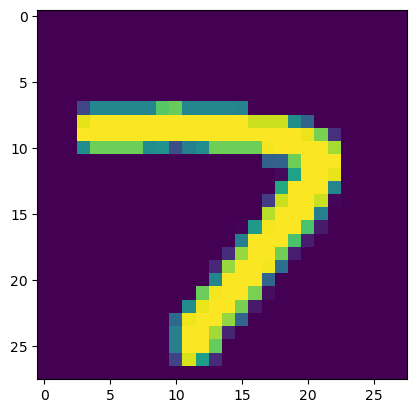

In [47]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[13021,1:].values.reshape(28,28))

## Deviding the dataframe column into X and y. 

In [48]:
X=df.iloc[:,1:]
y=df.iloc[:, 0]
X.shape, y.shape

((42000, 784), (42000,))

## Split our model.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y,random_state=42, test_size=0.2)

In [50]:
X_train.shape

(33600, 784)

## Chossing the KNeighborsClassifier which helps best in determing the type of number present in the dataset.

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn=KNeighborsClassifier()

## Fitting our data

In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting

In [54]:
y_pred=knn.predict(X_test)

## Checking the accuracy

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

<ul>
<li> The above method comes in handy because it shares a lot of information about the input dataset, however the computation cost escalates too high with each increasing feature.</li>
<li> We can't still extract most of the information using the important features which explains the data substantially.</li>
<li> However chossing the right features is not the only thing that increases the efficiency of predictability. **If we can create new features derieved from their parent feature, then we can explain more variance using this new sets of feature**</li>
</ul>

## To resolve above problem we implement <b> Principle Component Analysis </b>

## Lets scale our feature
Scaling is always good for the data

In [56]:
#lets standardize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [57]:
X_train=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(scaler.fit_transform(X_test), columns=X_train.columns)

In [58]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,...,3.360000e+04,3.360000e+04,3.360000e+04,3.360000e+04,3.360000e+04,3.360000e+04,33600.0,33600.0,33600.0,33600.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.078502e-17,1.015061e-17,5.445380e-18,-3.277801e-18,1.850372e-18,-1.348128e-18,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.476934e-02,-2.678516e-02,-1.875717e-02,-1.282724e-02,-1.017325e-02,-7.711114e-03,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.476934e-02,-2.678516e-02,-1.875717e-02,-1.282724e-02,-1.017325e-02,-7.711114e-03,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.476934e-02,-2.678516e-02,-1.875717e-02,-1.282724e-02,-1.017325e-02,-7.711114e-03,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.476934e-02,-2.678516e-02,-1.875717e-02,-1.282724e-02,-1.017325e-02,-7.711114e-03,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.793522e+01,5.488441e+01,7.183838e+01,1.285742e+02,1.199106e+02,1.338572e+02,0.0,0.0,0.0,0.0


## Lets implement PCA using the best 100 newly created features derieved from their parent features

In [59]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

## Fit the data

In [60]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

## Apply KNeighborsClassifier

In [61]:
knn=KNeighborsClassifier()
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [62]:
y_pred=knn.predict(X_test_trf)

### Compared to our previous result, we can see that just by using the best 100 derieved features, our prediction works outstandingly well.

In [77]:
accuracy_score(y_pred, y_test)

0.9542857142857143

## Lets apply PCA for 2 columns
These are the 2 best features created from their parent features, based on this we can do some exploratory data analysis. Also it becomes easier to visualize in 2d or 3d.

In [78]:
#Lets apply pca for n_components=2
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

## Lets plot the graph of the selected component

In [79]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=X_train_trf[:, 0], y=X_train_trf[:, 1], color=y_train_trf, color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

## Lets apply PCA for 3 feature and lets do the exploratory analysis

In [66]:
#Lets apply pca for n_components=3
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [67]:
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:, 1], z=X_train_trf[:,2], color=y_train_trf)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

## Eigen value can be determined using this attribute
Hence 3 features are used the Eigne value came out to be 3 as well

In [68]:
pca.explained_variance_
#eigen values

array([40.67111198, 29.17023398, 26.74459616])

## Lets get the vector which can result in formation of new feature
Since we choose to use 3 feature, our PCA class return us vector of 3*784 matrix, consisting of 3 rows indicating that their are 3 vector with 784 values and each vector represent the eigen vector and once we identify our eigen vector we can simple dot product out input dataset with the eigen vector to get best 3 features which is most suitable for our prediction based on 3 features

In [69]:
pca.components_

array([[-7.17705951e-19,  9.50871577e-19,  2.63811419e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.10933045e-17, -4.91401665e-17, -4.23322006e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.30506232e-17, -3.78836483e-17, -5.31430091e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

## Just for the clarification, we calculate the shape

In [70]:
pca.components_.shape

(3, 784)

## So we multiple data with the transpose of the pca components


In [71]:
np.transpose(pca.components_)

array([[-7.17705951e-19, -2.10933045e-17,  2.30506232e-17],
       [ 9.50871577e-19, -4.91401665e-17, -3.78836483e-17],
       [ 2.63811419e-19, -4.23322006e-18, -5.31430091e-18],
       ...,
       [-0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00,  0.00000000e+00]])

In [72]:
np.transpose(pca.components_).shape

(784, 3)

## Now how to determine the number of estimators
My creativity ;->

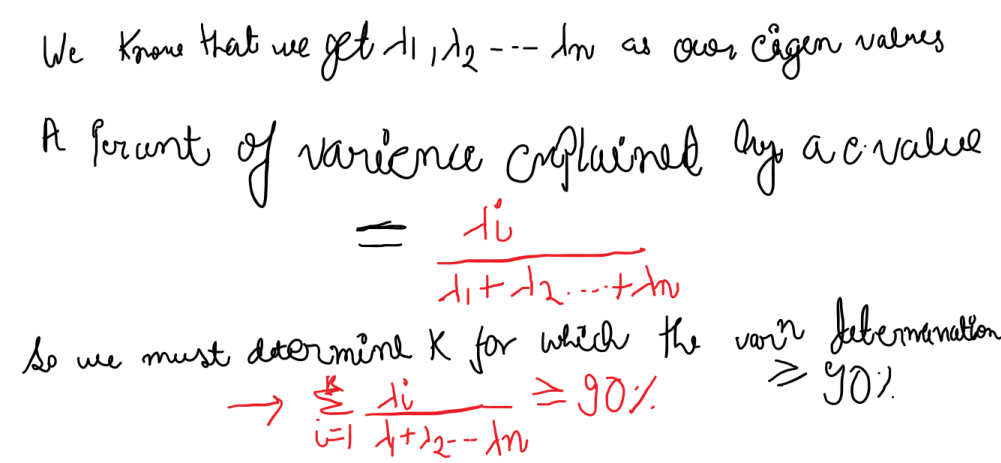

## So inorder to choose features I must determine those significant columns which explins the variance greated than 90

In [82]:
#So lets run PCA for all features
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [83]:
k=np.array(pca.explained_variance_)
sum=k.sum()
k=k/sum*100
k #we could also use 'pca.explained_variance_ratio_'

array([5.78519225e+00, 4.14926968e+00, 3.80423901e+00, 2.96626277e+00,
       2.58156168e+00, 2.25498018e+00, 1.97306802e+00, 1.77527998e+00,
       1.56865066e+00, 1.43606328e+00, 1.37025484e+00, 1.22725500e+00,
       1.14691200e+00, 1.12302739e+00, 1.05852885e+00, 1.01993106e+00,
       9.57676152e-01, 9.42708817e-01, 9.12489429e-01, 8.90170190e-01,
       8.39940495e-01, 8.20063196e-01, 7.85303229e-01, 7.56739707e-01,
       7.37261022e-01, 7.01884653e-01, 6.97919728e-01, 6.71104483e-01,
       6.39845030e-01, 6.30337291e-01, 6.15350848e-01, 6.02388659e-01,
       5.83673972e-01, 5.78547759e-01, 5.72333148e-01, 5.46399774e-01,
       5.43207369e-01, 5.28172755e-01, 5.13381744e-01, 4.94015474e-01,
       4.87671103e-01, 4.81978768e-01, 4.68204430e-01, 4.59342487e-01,
       4.57660834e-01, 4.49219022e-01, 4.44682221e-01, 4.41540749e-01,
       4.35111936e-01, 4.32032928e-01, 4.21808870e-01, 4.18243127e-01,
       4.07994349e-01, 4.02004913e-01, 3.98335855e-01, 3.94598812e-01,
      

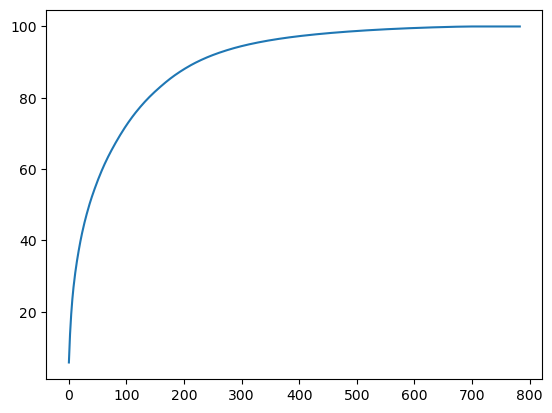

In [84]:
## Lets find cumulative sum of all the vector
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(np.cumsum(k))

In [85]:
#So we can see that at around 200-220 features, we can see that we can get good result